In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.8)

In [2]:
adnimerge = pd.read_csv("ADNIMERGE.csv")
adnimerge = adnimerge[adnimerge.COLPROT=="ADNI1"]
adnimerge.head()

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,2005-09-08,CN,74.3,Male,...,NaN,NaN,1.36926,NaN,NaN,0.000000,0.00000,0,0,2017-08-13 23:50:48.0
1,3,011_S_0003,bl,11,ADNI1,ADNI1,2005-09-12,AD,81.3,Male,...,NaN,NaN,1.09079,NaN,NaN,0.000000,0.00000,0,0,2017-08-13 23:50:48.0
2,3,011_S_0003,m06,11,ADNI1,ADNI1,2006-03-13,AD,81.3,Male,...,NaN,NaN,1.09079,NaN,NaN,0.498289,5.96721,6,6,2017-08-13 23:50:48.0
3,3,011_S_0003,m12,11,ADNI1,ADNI1,2006-09-12,AD,81.3,Male,...,NaN,NaN,1.09079,NaN,NaN,0.999316,11.96720,12,12,2017-08-13 23:50:48.0
4,3,011_S_0003,m24,11,ADNI1,ADNI1,2007-09-12,AD,81.3,Male,...,NaN,NaN,1.09079,NaN,NaN,1.998630,23.93440,24,24,2017-08-13 23:50:48.0


In [3]:
cols_of_interests = ['RID', 'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT',
                     'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'FDG', 'PIB',
                     'CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT_immediate', 
                     'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting',
                     'FAQ', 'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 
                     'Fusiform', 'MidTemp', 'ICV', 'DX', 'Month_bl', 'Month']
cols_bl = ['CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'MMSE_bl', 'RAVLT_immediate_bl',
           'RAVLT_learning_bl', 'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 
           'FAQ_bl', 'Ventricles_bl', 'Hippocampus_bl', 'WholeBrain_bl', 'Entorhinal_bl',
           'Fusiform_bl', 'MidTemp_bl', 'ICV_bl', 'FDG_bl','PIB_bl']

adnimerge_clean = adnimerge[cols_of_interests].copy()
adnimerge_clean.head()

,RID,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,APOE4,FDG,...,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,DX,Month_bl,Month
0,2,CN,74.3,Male,16,Not Hisp/Latino,White,Married,0.0,1.36926,...,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,CN,0.00000,0
1,3,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.09079,...,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,Dementia,0.00000,0
2,3,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.06360,...,88580.0,5446.0,1100060.0,2427.0,14400.0,16972.0,1906430.0,Dementia,5.96721,6
3,3,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.10384,...,90099.0,5157.0,1095640.0,1596.0,14617.0,17330.0,1903820.0,Dementia,11.96720,12
4,3,AD,81.3,Male,18,Not Hisp/Latino,White,Married,1.0,1.03871,...,97420.0,5139.0,1088560.0,1175.0,14033.0,16398.0,1903420.0,Dementia,23.93440,24


In [4]:
adnimerge_clean['DX_bl'] = adnimerge_clean['DX_bl'].map({'CN':0,'LMCI':1,'AD':2})
adnimerge_clean['PTGENDER'] = adnimerge_clean['PTGENDER'].map({'Female':0,'Male':1})
adnimerge_clean = pd.get_dummies(adnimerge_clean, columns=['PTRACCAT'], drop_first=True)
adnimerge_clean = adnimerge_clean[adnimerge_clean.PTETHCAT!='Unknown']
adnimerge_clean = adnimerge_clean[adnimerge_clean.PTMARRY!='Unknown']
adnimerge_clean = pd.get_dummies(adnimerge_clean, columns=['PTMARRY'], drop_first=True)

col_names_replaced = [col.replace(' ', '_') for col in adnimerge_clean.columns]
adnimerge_clean.rename(columns=dict(zip(adnimerge_clean.columns, col_names_replaced)), inplace=True)

print(adnimerge_clean.shape)
adnimerge_clean.head()

(4981, 35)


,RID,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,APOE4,FDG,PIB,CDRSB,...,DX,Month_bl,Month,PTRACCAT_Asian,PTRACCAT_Black,PTRACCAT_More_than_one,PTRACCAT_White,PTMARRY_Married,PTMARRY_Never_married,PTMARRY_Widowed
0,2,0,74.3,1,16,Not Hisp/Latino,0.0,1.36926,NaN,0.0,...,CN,0.00000,0,0,0,0,1,1,0,0
1,3,2,81.3,1,18,Not Hisp/Latino,1.0,1.09079,NaN,4.5,...,Dementia,0.00000,0,0,0,0,1,1,0,0
2,3,2,81.3,1,18,Not Hisp/Latino,1.0,1.06360,NaN,6.0,...,Dementia,5.96721,6,0,0,0,1,1,0,0
3,3,2,81.3,1,18,Not Hisp/Latino,1.0,1.10384,NaN,3.5,...,Dementia,11.96720,12,0,0,0,1,1,0,0
4,3,2,81.3,1,18,Not Hisp/Latino,1.0,1.03871,NaN,8.0,...,Dementia,23.93440,24,0,0,0,1,1,0,0


In [5]:
print('Number of CN   patients:',
      np.sum((adnimerge_clean['DX_bl']==0)&(adnimerge_clean['Month']==0)))
print('Number of LMCI patients:',
      np.sum((adnimerge_clean['DX_bl']==1)&(adnimerge_clean['Month']==0)))
print('Number of AD   patients:',
      np.sum((adnimerge_clean['DX_bl']==2)&(adnimerge_clean['Month']==0)))

Number of CN   patients: 227
Number of LMCI patients: 399
Number of AD   patients: 186


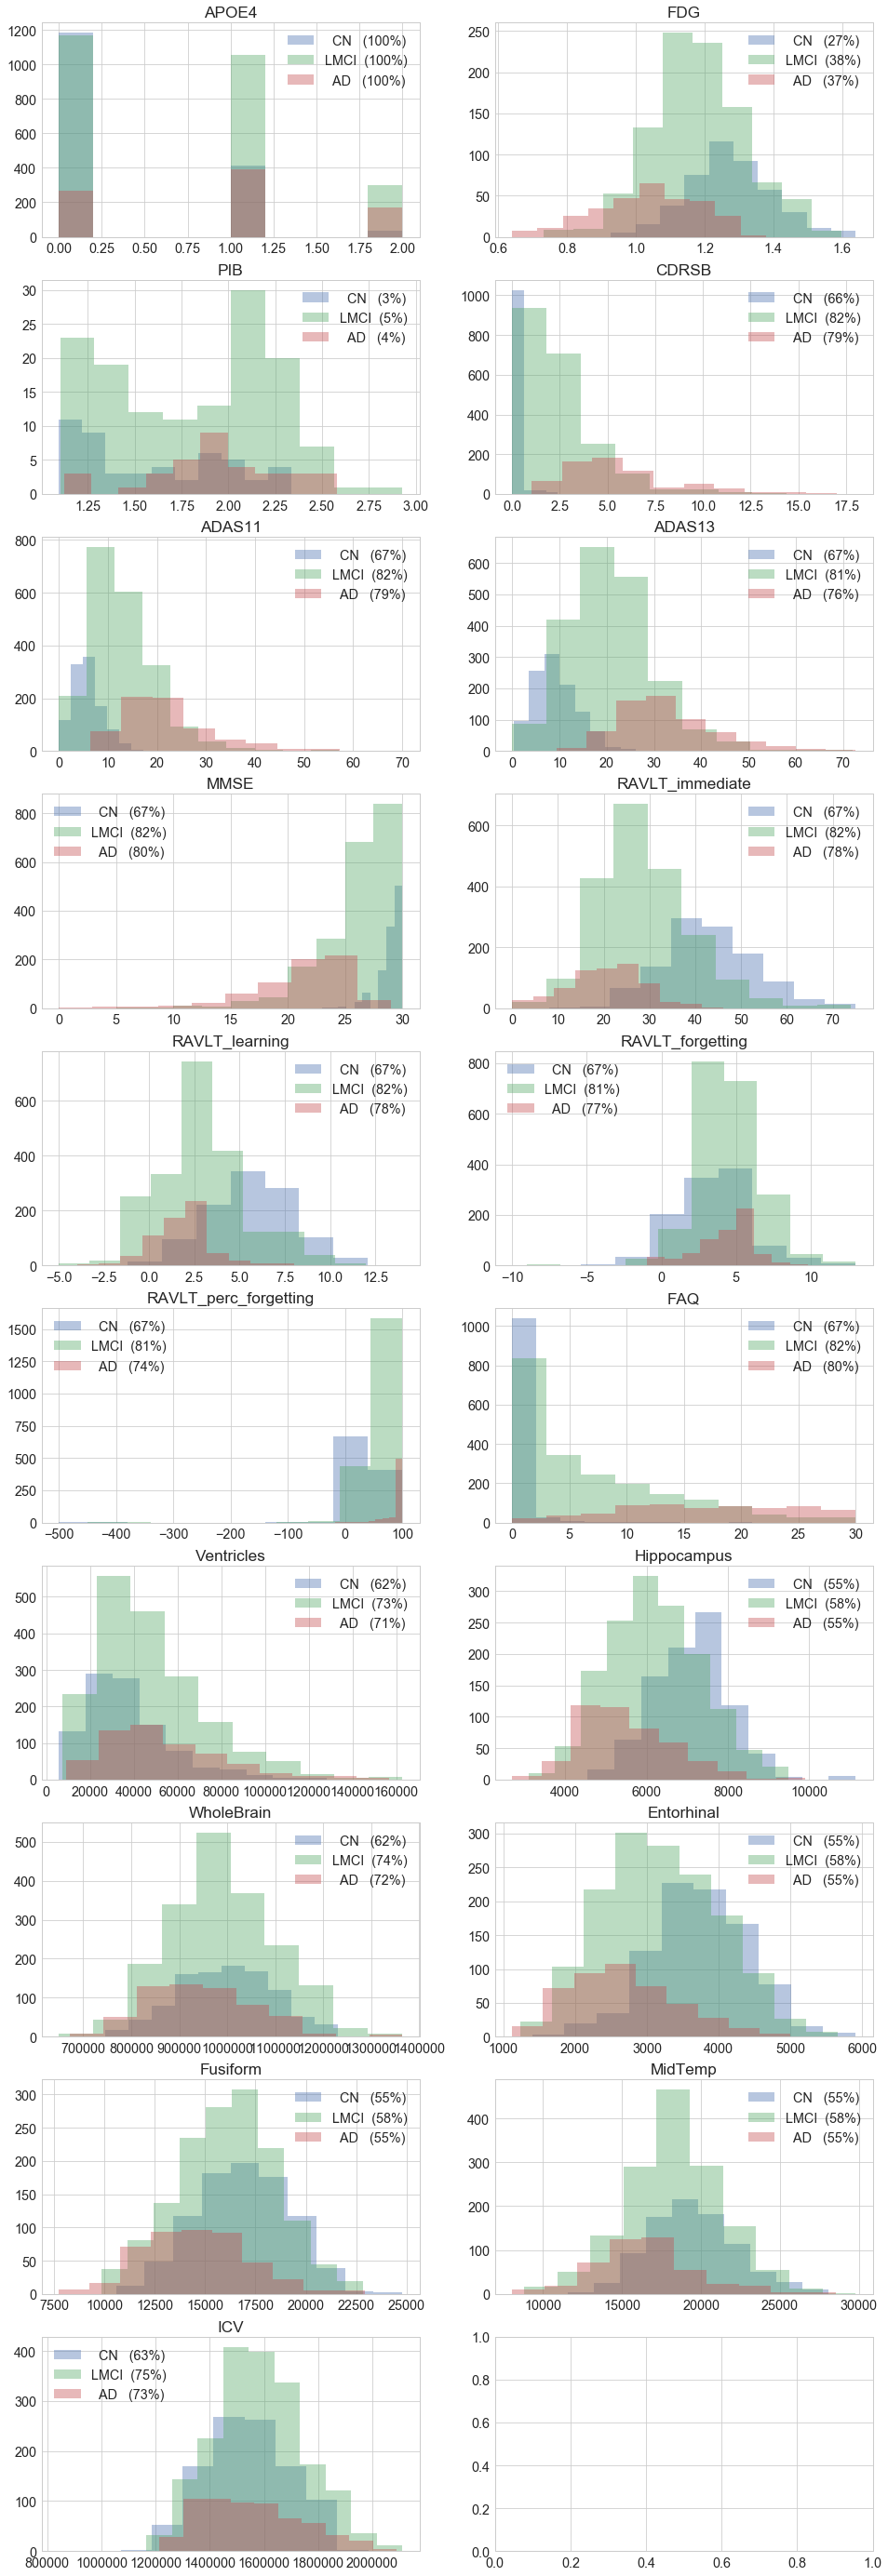

In [6]:
adnimerge_clean_CN = adnimerge_clean[adnimerge_clean['DX_bl']==0]
adnimerge_clean_LMCI = adnimerge_clean[adnimerge_clean['DX_bl']==1]
adnimerge_clean_AD = adnimerge_clean[adnimerge_clean['DX_bl']==2]

fig, ax = plt.subplots(10, 2, figsize=(16, 50))
for i in range(6, 25):
    row = (i-6)//2
    col = (i-6) % 2
    col_name = adnimerge_clean.columns[i]
    mis_rate_CN = np.mean(adnimerge_clean_CN[col_name].isnull())
    mis_rate_LMCI = np.mean(adnimerge_clean_LMCI[col_name].isnull())
    mis_rate_AD = np.mean(adnimerge_clean_AD[col_name].isnull())
    adnimerge_clean_CN[col_name].hist(
        ax=ax[row, col], alpha=0.4, 
        label='{:^6} ({:0.0f}%)'.format('CN', 100*(1-mis_rate_CN)))
    adnimerge_clean_LMCI[col_name].hist(
        ax=ax[row, col], alpha=0.4, 
        label='{:^5} ({:0.0f}%)'.format('LMCI', 100*(1-mis_rate_LMCI)))
    adnimerge_clean_AD[col_name].hist(
        ax=ax[row, col], alpha=0.4, 
        label='{:^6} ({:0.0f}%)'.format('AD', 100*(1-mis_rate_AD)))
    ax[row, col].set_title(col_name)
    ax[row, col].legend(loc='best')

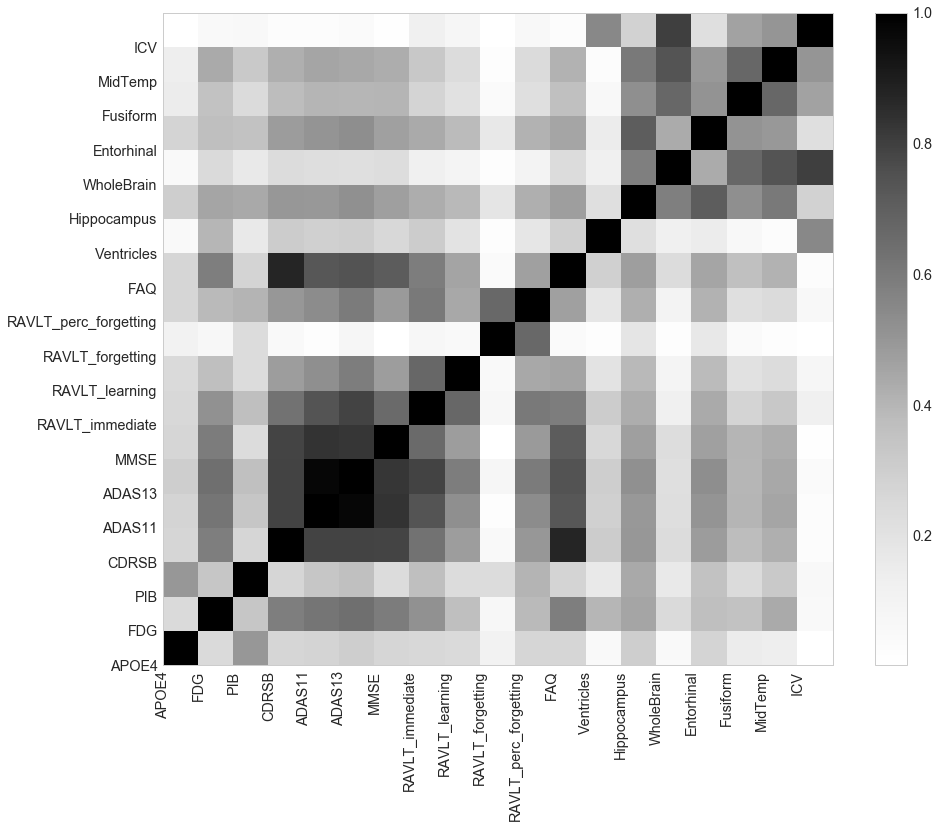

In [7]:
def plot_correlation_heatmap(df, ax):
    df_copy = df.copy()
    N = df.shape[1]
    corr_matrix = np.zeros((N, N))
    for i,icol in enumerate(df.columns):
        for j,jcol in enumerate(df.columns):
            idx_available = np.where(
                (~df[icol].isnull()) & (~df[jcol].isnull()))
            ival = df[icol].values[idx_available]
            jval = df[jcol].values[idx_available]
            cov = np.mean(ival*jval) - np.mean(ival)*np.mean(jval)
            corr = cov / np.std(ival) / np.std(jval)
            corr_matrix[i,j] = corr
            
    ax.set_xticks(ticks=range(len(df.columns)))
    ax.set_yticks(ticks=range(len(df.columns)))
    ax.set_xticklabels(df.columns, rotation='vertical')
    ax.set_yticklabels(df.columns)
    plot = ax.pcolor(np.abs(corr_matrix))
    return plot

cols_continuous = adnimerge_clean.columns[6:25]
fig, ax = plt.subplots(figsize=(15,12))
plot = plot_correlation_heatmap(adnimerge_clean[cols_continuous], ax)
fig.colorbar(plot)

In [8]:
def imputation_mean(df, cols):
    df_copy = df.copy()
    for c in cols:
        c_mean = np.mean(df[c])
        df_copy[c] = df[c].map(lambda x:c_mean if np.isnan(x) else x)
    return df_copy

adnimerge_imputed = imputation_mean(adnimerge_clean, cols_continuous)
print(adnimerge_imputed.shape)
adnimerge_imputed.head()

(4981, 35)


,RID,DX_bl,AGE,PTGENDER,PTEDUCAT,PTETHCAT,APOE4,FDG,PIB,CDRSB,...,DX,Month_bl,Month,PTRACCAT_Asian,PTRACCAT_Black,PTRACCAT_More_than_one,PTRACCAT_White,PTMARRY_Married,PTMARRY_Never_married,PTMARRY_Widowed
0,2,0,74.3,1,16,Not Hisp/Latino,0.0,1.36926,1.781273,0.0,...,CN,0.00000,0,0,0,0,1,1,0,0
1,3,2,81.3,1,18,Not Hisp/Latino,1.0,1.09079,1.781273,4.5,...,Dementia,0.00000,0,0,0,0,1,1,0,0
2,3,2,81.3,1,18,Not Hisp/Latino,1.0,1.06360,1.781273,6.0,...,Dementia,5.96721,6,0,0,0,1,1,0,0
3,3,2,81.3,1,18,Not Hisp/Latino,1.0,1.10384,1.781273,3.5,...,Dementia,11.96720,12,0,0,0,1,1,0,0
4,3,2,81.3,1,18,Not Hisp/Latino,1.0,1.03871,1.781273,8.0,...,Dementia,23.93440,24,0,0,0,1,1,0,0
